### Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that improve model performance. It plays a critical role in both traditional machine learning and modern AI workflows.

---

#### **Key Steps in Feature Engineering**

- **Feature Transformation**: Modifying existing features to better represent the data.
- **Feature Construction**: Creating new features using domain knowledge.
- **Feature Selection**: Selecting the most relevant features from the dataset.
- **Feature Extraction**: Deriving new features from the original ones (e.g., PCA, LDA).
- **Missing Value Imputation**: Handling null values using techniques like mean, median, mode, or model-based approaches.
- **Feature Splitting**: Dividing complex features (like datetime) into simpler components (e.g., year, month).
- **Handling Categorical Features**: Using label encoding, one-hot encoding, or embeddings.
- **Outlier Detection**: Identifying and handling outliers that may affect model performance.
- **Feature Scaling**: Normalization or standardization to ensure all features contribute equally.

---

### Curse of Dimensionality

As the number of dimensions (features) increases, the data becomes sparse and harder to analyze. This is known as the **curse of dimensionality**. It causes:

- **Performance degradation**
- **Increased computational cost**
- **Overfitting risk**

---

### Dimensionality Reduction Techniques

#### 1. **Feature Selection**
- **Forward Selection**
- **Backward Elimination**

#### 2. **Feature Extraction**
- **PCA (Principal Component Analysis)**
- **LDA (Linear Discriminant Analysis)**
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**

---

### Principal Component Analysis (PCA)

PCA is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

- **Principal Components** are new axes along which the variance in the data is maximized.
- These components are **orthogonal** (linearly independent) and capture different aspects of the data.

#### Key Concepts:
- **Variance**: Indicates how much spread there is in the data. PCA tries to preserve the direction with the highest variance.
- **Covariance Matrix**: Represents the relationships (variances and covariances) among features.
- **Eigenvectors**: Directions in the transformed space (principal components).
- **Eigenvalues**: Measure how much variance is captured by each eigenvector.

> The first principal component corresponds to the eigenvector with the highest eigenvalue (maximum variance direction).

---

### Summary

- **Feature Selection** helps identify important features.
- **Feature Extraction** helps reduce dimensionality while preserving information.
- PCA is essential when you want to compress data, speed up training, and remove multicollinearity.


# 🧠 Principal Component Analysis (PCA) - Step-by-Step Guide

**Principal Component Analysis (PCA)** is a statistical technique used for **dimensionality reduction** and **data exploration**. It transforms high-dimensional data into a lower-dimensional space while preserving as much **variance** as possible. It does this by identifying the **principal components**, which are directions of maximum variance in the dataset.

---

## ✅ Why Use PCA?

- Reduce the number of features (dimensions) while retaining key information
- Remove multicollinearity
- Improve model performance and training speed
- Visualize high-dimensional data in 2D or 3D
- Handle correlated features effectively

---

## 🪜 Steps of PCA (Assume 3D Dataset)

### **Step 1: Mean Centering the Data**
- Compute the **mean** for each feature (X, Y, Z)
- Subtract the mean from each data point

This centers the data around the origin:

$$
X_{\text{centered}} = X - \mu
$$

Where \(\mu\) is the mean vector of all features.

---

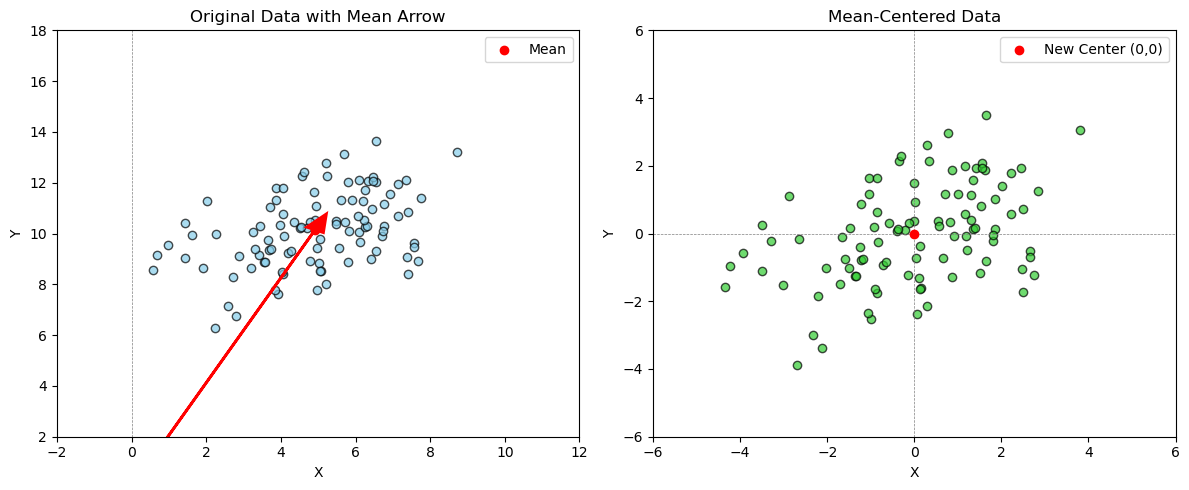

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random 2D data (X, Y)
np.random.seed(0)
X = np.random.multivariate_normal(mean=[5, 10], cov=[[3, 1], [1, 2]], size=100)

# Calculate mean
mean_vector = np.mean(X, axis=0)

# Mean center the data
X_centered = X - mean_vector

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ["Original Data with Mean Arrow", "Mean-Centered Data"]

# First Plot: Original Data + Arrow to Mean
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='skyblue', edgecolor='k')
axes[0].arrow(0, 0, mean_vector[0], mean_vector[1],
              head_width=0.5, head_length=0.7, fc='red', ec='red', linewidth=2)
axes[0].scatter(*mean_vector, color='red', label='Mean', zorder=5)
axes[0].set_title(titles[0])
axes[0].legend()
axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=0.5)
axes[0].set_xlim(-2, 12)
axes[0].set_ylim(2, 18)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Second Plot: Mean-Centered Data
axes[1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7, color='limegreen', edgecolor='k')
axes[1].scatter(0, 0, color='red', label='New Center (0,0)', zorder=5)
axes[1].set_title(titles[1])
axes[1].legend()
axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=0.5)
axes[1].set_xlim(-6, 6)
axes[1].set_ylim(-6, 6)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.tight_layout()
plt.show()




### **Step 2: Compute the Covariance Matrix**
This matrix shows how much two features vary together.

$$
\text{Cov}(X) = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

For 3D data, the matrix looks like:

$$
\text{Cov} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x,y) & \text{Cov}(x,z) \\
\text{Cov}(y,x) & \text{Var}(y) & \text{Cov}(y,z) \\
\text{Cov}(z,x) & \text{Cov}(z,y) & \text{Var}(z)
\end{bmatrix}
$$

---

### **Step 3: Compute Eigenvalues and Eigenvectors**
Perform eigen-decomposition on the covariance matrix:

$$
\text{Cov}(X) = V \Lambda V^{-1}
$$

Where:
- \(V\) contains the **eigenvectors** (directions of maximum variance)
- \(\Lambda\) contains the **eigenvalues** (variance explained)

- The **first principal component** = eigenvector with largest eigenvalue
- The **second component** is orthogonal to the first, and so on

---

### **Step 4: Dimensionality Reduction**
Select top \(k\) eigenvectors corresponding to the top \(k\) eigenvalues, and project data onto this new subspace:

$$
X_{\text{reduced}} = X_{\text{centered}} \cdot W_k
$$

Where \(W_k\) is the matrix of top \(k\) eigenvectors.

---

## 🔍 Key Concepts

- **Eigenvectors** indicate directions of the new feature space
- **Eigenvalues** indicate the importance (variance explained)
- **Covariance matrix** shows how data is spread and oriented
- The **first principal component** captures maximum variance

---

## 🖼️ Visualizing PCA (3D to 2D)

Use a three-step diagram to visualize the PCA process:
1. Original data in 3D space  
2. Mean-centered data  
3. Projected data on 2D principal component plane  

*(Use `matplotlib` or `plotly` with subplots for 3D and 2D)*

> Example plots:
> - 3D scatter of original data  
> - Mean-centered 3D data  
> - 2D scatter plot on principal components

---

## ⚠️ Notes

- PCA assumes **linearity** in the data
- Scaling is essential: apply **standardization or normalization**
- Useful for **feature reduction**, **noise removal**, and **visualization**
- PCA doesn't preserve interpretability of original features

---



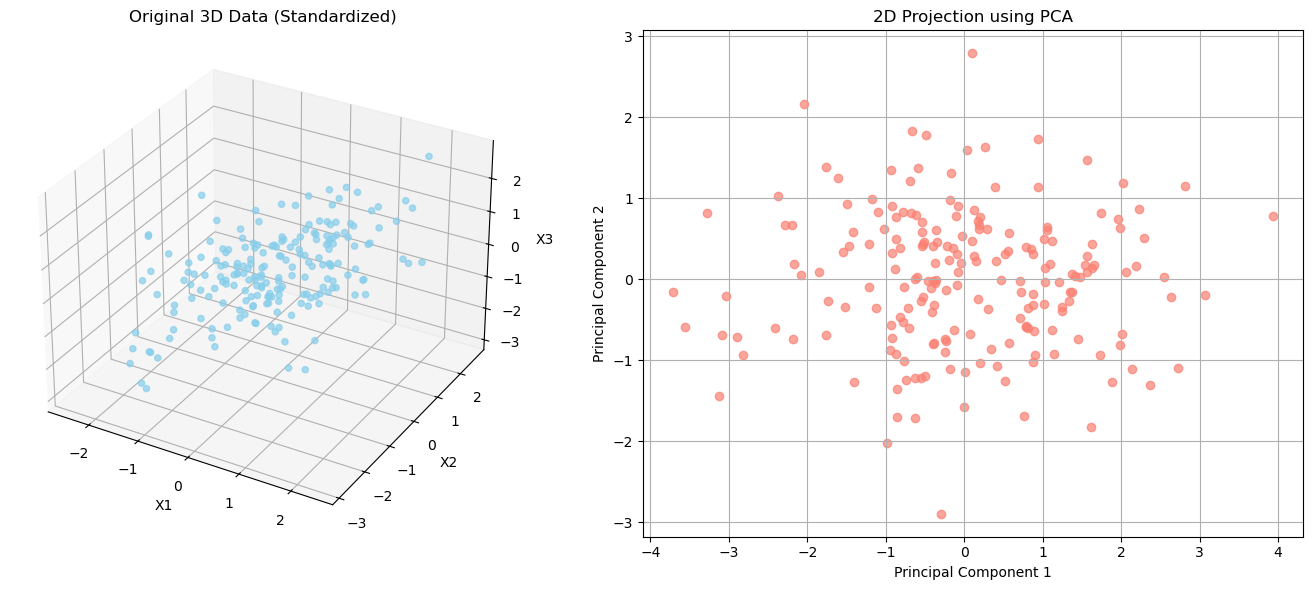

In [1]:
# Re-import necessary packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Generate synthetic 3D data
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 0.5], [1, 0.5, 1]]  # Covariance matrix
X = np.random.multivariate_normal(mean, cov, 200)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce from 3D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting original 3D data and 2D PCA result
fig = plt.figure(figsize=(14, 6))

# Original 3D plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c='skyblue', alpha=0.7)
ax1.set_title("Original 3D Data (Standardized)")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

# PCA 2D plot
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c='salmon', alpha=0.7)
ax2.set_title("2D Projection using PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.grid(True)

plt.tight_layout()
plt.show()


# Optimum Number of Principal Components (PCA)

When applying PCA, especially in high-dimensional data like MNIST (784-dimensional), you'll get as many **principal components (PCs)** as the number of features — i.e., 784 PCs with eigenvalues λ₁, λ₂, ..., λ₇₈₄.

Each **eigenvalue λᵢ** represents the **amount of variance explained** by its corresponding **eigenvector (principal component)**.

## Explained Variance

To find out how much variance each PC explains:

$$
\text{Explained Variance Ratio for } \lambda_i = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

Where:
- λᵢ is the eigenvalue for component i
- n is the total number of components

You typically select the number of components such that the **cumulative explained variance** is **at least 90%**.

---

## Example (Simulated)

Suppose the first few eigenvalues (λ) are:

| Component | λᵢ  | Cumulative Variance (%) |
|-----------|------|--------------------------|
| PC1       | 38   | 38%                      |
| PC2       | 10   | 48%                      |
| PC3       | 5    | 53%                      |
| PC4       | 3    | 56%                      |
| PC5       | 2    | 58%                      |
| ...       | ...  | ...                      |

To reach **90% variance**, you continue summing until cumulative variance crosses 90%.

---

## Python Code to Find Optimum Number of PCs



Number of components to retain 90% variance: 21


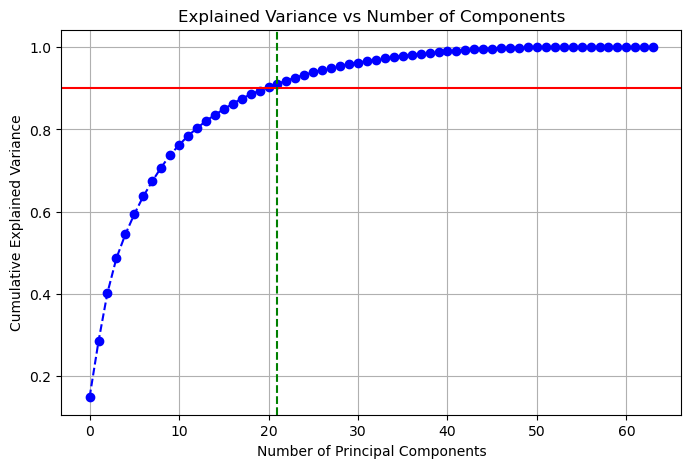

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load sample data (e.g., handwritten digits 8x8 = 64 features)
data = load_digits()
X = data.data

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 90% variance
k = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {k}")

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axvline(x=k, color='g', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()
